Example of using logistic regression on Iris dataset

### Import libraries

In [61]:
from sklearn import datasets
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

# np.random.seed(42)

### Load data

In [62]:
iris = datasets.load_iris()
print(type(iris))
print(iris.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [63]:
print(iris["target_names"])
print(iris["feature_names"])
print(iris["filename"])
# print(iris["DESCR"])
print(type(iris["data"]))
print(iris["data"].shape)
print(type(iris["target"]))
print(iris["target"].shape)
print(np.unique(iris["target"]))

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
/Users/thaitrinh/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/datasets/data/iris.csv
<class 'numpy.ndarray'>
(150, 4)
<class 'numpy.ndarray'>
(150,)
[0 1 2]


### Example 1: Classify virginica or not based only on petal width

In [64]:
# get only petal width as feature
X1 = iris["data"][:,3].reshape(-1, 1)
y1 = (iris["target"]==2)

In [65]:
lr1 = LogisticRegression(solver="liblinear")
lr1.fit(X1, y1)
y1_pred = lr1.predict(X1)
y1_pred_prob = lr1.predict_proba(X1)

Let’s look at the model’s estimated probabilities for flowers with petal widths varying
from 0 to 3 cm

In [66]:
xnew = np.linspace(0, 3., 1000).reshape(-1, 1)
ynew_prob = lr1.predict_proba(xnew)

# probability of being virginica
p1 = ynew_prob[:, 1]
# probability of being not virginica
p0 = ynew_prob[:, 0]

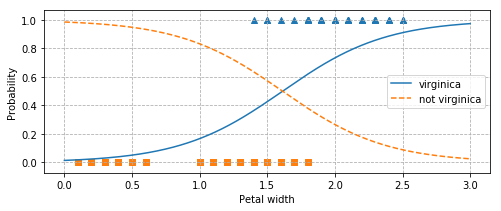

In [67]:
true_virgin_x = X1[y1==1]
true_virgin_y = y1[y1==1]
true_not_virgin_x = X1[y1==0]
true_not_virgin_y = y1[y1==0]

fig, ax = plt.subplots(figsize=(8,3))
ax.plot(xnew, p1, "-", label="virginica")
ax.plot(xnew, p0, "--", label="not virginica")
ax.scatter(true_virgin_x, true_virgin_y, marker="^")
ax.scatter(true_not_virgin_x, true_not_virgin_y, marker="s")
ax.set_xlabel("Petal width")
ax.set_ylabel("Probability")
ax.legend()
ax.grid(True, linestyle="--")

There is a decision boundary at around 1.6 cm where both probabilities are equal to 50%:
- if the petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris-Virginica
- or else it will predict that it is not (even if it is not very confident)

In [68]:
lr1.predict([[1.7], [1.5]])

array([ True, False])

### Example 2: Using both petal width and length (2 dimensions)

In [69]:
# get only petal width as feature
X2 = iris["data"][:,2:]
y2 = (iris["target"]==2)

In [73]:
lr2 = LogisticRegression(solver="liblinear", random_state=42, C=10**10)
lr2.fit(X2, y2)
y2_pred = lr2.predict(X2)
y2_pred_prob = lr2.predict_proba(X2)

Let’s look at the model’s estimated probabilities for flowers with petal widths varying from 0 to 3 cm, petal length from 2.5 to 7 cm

In [74]:
new_widths = np.linspace(0.8, 2.7, 200)
new_lengths = np.linspace(2.9, 7, 500)

x0, x1 = np.meshgrid(new_lengths, new_widths)
xnew = np.c_[x0.ravel(), x1.ravel()]
ynew_proba = lr2.predict_proba(xnew)

Text(0, 0.5, 'petal width')

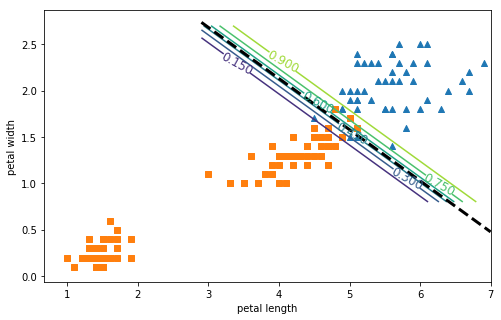

In [88]:
fig, ax = plt.subplots(figsize=(8,5))
# plot the lines with the same probability
ct = plt.contour(x0, x1, ynew_proba[:, 1].reshape(x0.shape))
# and the decision boundary
left_right = np.array([2.9, 7])
boundary = -(lr2.coef_[0][0] * left_right + lr2.intercept_[0]) / lr2.coef_[0][1]
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.clabel(ct, inline=1, fontsize=12)

# plot data
plt.scatter(X2[y2==1][:,0], X2[y2==1][:,1], marker="^")
plt.scatter(X2[y2==0][:,0], X2[y2==0][:,1], marker="s")

plt.xlabel("petal length")
plt.ylabel("petal width")